In [436]:
options(dplyr.summarise.inform = FALSE)
library(tidyverse)
library(data.table)
library(survival)

In [437]:
source(paste0(dirname(getwd()),'/map.r'))
source(paste0(dirname(getwd()),'/stats.r'))

#### Run a test

In [438]:
go <- fread("/mnt/petasan_immunocomp/datasets/hartwig/biomarkers/share/biomarkers_ex.csv")
features <- names(go %>% select(-contains("clin_"), -sampleId))

In [459]:
go %>% select(contains("Y_"))

Y_bor,Y_os_event,Y_os_days,purity_diploidProportion,purity_ploidy,purity_polyclonalProportion,purity_WGD,purity_msIndelsPerMb,purity_msStatus,purity_tml,⋯,rna_geneset_KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC,rna_geneset_KEGG_FATTY_ACID_METABOLISM,rna_geneset_KEGG_PRIMARY_BILE_ACID_BIOSYNTHESIS,rna_geneset_KEGG_ONE_CARBON_POOL_BY_FOLATE,rna_geneset_KEGG_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROME_P450,rna_geneset_KEGG_BIOSYNTHESIS_OF_UNSATURATED_FATTY_ACIDS,rna_geneset_KEGG_OLFACTORY_TRANSDUCTION,rna_geneset_KEGG_MATURITY_ONSET_DIABETES_OF_THE_YOUNG,rna_geneset_HALLMARK_INFLAMMATORY_RESPONSE,rna_geneset_HALLMARK_FATTY_ACID_METABOLISM
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,0,NA,0.0009,3.15,0.0648,1,0.07408654,0,3.496508,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0,1,318,0.8621,2.02,0.0086,0,0.09440068,0,3.850148,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,NA,0.0556,3.35,0.0331,1,0.04783733,0,3.850148,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,NA,0.2677,2.60,0.0000,1,0.01074210,0,2.197225,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,NA,0.5317,1.82,0.0048,0,0.25572690,0,3.828641,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,NA,0.5961,1.82,0.1491,0,0.01074210,0,2.833213,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,NA,0.6963,1.96,0.0013,0,0.11172025,0,5.446737,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,NA,0.0617,2.86,0.2023,1,0.12513373,0,4.584967,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,0,1300,0.9062,1.98,0.0010,0,0.01113774,0,2.944439,⋯,3.101241,2.638264,1.784116,2.628147,1.070565,2.626958,0.2190700,0.4713440,1.924012,2.944839


In [465]:
coxph( Surv(Y_os_days, Y_os_event) ~ purity_ploidy, data = go %>% drop_na(Y_os_event))

Call:
coxph(formula = Surv(Y_os_days, Y_os_event) ~ purity_ploidy, 
    data = go %>% drop_na(Y_os_event))

                 coef exp(coef) se(coef)     z       p
purity_ploidy 0.05914   1.06092  0.02209 2.677 0.00743

Likelihood ratio test=7  on 1 df, p=0.008142
n= 3146, number of events= 2273 
   (2951 observations deleted due to missingness)

In [444]:
options(repr.plot.width = 15, repr.plot.height = 15)

In [462]:
results <- data.frame()
for( i in features){
    print(i); flush.console()
    results <- rbind(results, 
                     get_stats2( y = "Surv(Y_os_event, Y_os_days)", 
                                 x = i, 
                                 covariate = "+clin_primaryTumorLocation + Y_bor", 
                                 data = "go", 
                                 model = "coxph"))
}

[1] "Y_bor"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "Y_os_event"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "Y_os_days"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "purity"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "purity_diploidProportion"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "purity_ploidy"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "purity_polyclonalProportion"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "purity_WGD"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "purity_msIndelsPerMb"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "purity_msStatus"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "purity_tml"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "purity_tmlStatus"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "purity_tmbPerMb"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "purity_tmbStatus"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "purity_svTMB"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ABCB1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ABL1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ACVR1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ACVR1B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ACVR2A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ADAM30"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_AFDN"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_AGBL4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_AJUBA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_AKT1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ALB"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ALK"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_AMBRA1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_AMER1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ANK1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ANKRD11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_APC"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_AR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ARAF"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ARHGAP35"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ARID1A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ARID1B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ARID2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ARID5B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ASXL1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ASXL2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ATG7"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ATM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ATP1A1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ATP2B3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ATR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ATRX"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_AXIN1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_AXIN2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_AXL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_B2M"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BAP1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BARD1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BCL2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BCL9L"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BCOR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BIRC3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BMPR1A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BMPR2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BRAF"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BRCA1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BRCA2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BRD7"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BRIP1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_BTK"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_C21orf91"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CACNA1D"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CALR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CARD11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CASP8"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CASZ1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CBFB"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CBL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CBLB"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CCND1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CCND2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CCND3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CCNE1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CCSER1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CD274"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CD44"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CD58"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CD79A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CD79B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CDC73"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CDH1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CDH10"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CDK12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CDK4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CDK6"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CDKN1A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CDKN1B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CDKN2A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CDKN2C"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CDX2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CEBPA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CHD1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CHD4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CHEK1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CHEK2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CIC"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CNOT3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_COL2A1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CREBBP"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CRLF2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CRYBG1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CSF1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CSF1R"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CSF3R"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CSMD1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CTCF"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CTNNA1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CTNNB1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CUL3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CUX1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CXCR4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_CYLD"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_DAXX"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_DDR2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_DDX3X"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_DEPDC5"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_DGCR8"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_DIAPH2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_DICER1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_DLG2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_DMD"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_DNM2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_DNMT3A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_DOCK8"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_DROSHA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_EEF1A1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_EGFR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_EIF1AX"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ELF3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_EML4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_EP300"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_EPAS1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_EPCAM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_EPHA2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ERBB2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ERBB3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ERBB4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ERCC2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ERF"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ERG"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ESR1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ETNK1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ETS2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_EYS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_EZH2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FANCA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FANCC"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FANCD2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FANCF"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FANCL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FANCM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FAT1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FAT4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FBXL17"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FBXO11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FBXW7"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FGF3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FGFR1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FGFR2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FGFR3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FGFR4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FH"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FHIT"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FLCN"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FLT1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FLT3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FLT4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FNTB"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FOSL2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FOXA1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FOXA2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FOXL2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FOXO3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FOXP1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FOXQ1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_FUBP1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_G6PD"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GATA1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GATA2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GATA3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GATA6"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GMDS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GNA11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GNAQ"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GNAS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GPHN"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GPS2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GRIN2A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GSK3B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GSTP1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_GTF2I"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_H1-2"
[1] "driver_H3-3A"
[1] "driver_H3-3B"
[1] "driver_H3C13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_H3C2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_HIF1A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_HLA-A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_HLA-B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_HLA-C"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_HNF1A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_HNRNPA2B1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_HOXC13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_HRAS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_IDH1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_IDH2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_IGF1R"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_IGLL5"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_IKBKB"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_IKZF1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_IL1RAPL1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_IL6ST"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_IL7R"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_IMMP2L"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_IRF2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_IRS2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ITGA9"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ITGAV"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_JAK1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_JAK2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_JAK3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_JMJD4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KANSL1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KCNJ5"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KDM5C"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KDM6A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KDR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KEAP1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KIT"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KLF4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KLF5"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KMT2A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KMT2B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KMT2C"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KMT2D"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KRAS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KRT5"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_KRTAP5-5"
[1] "driver_LATS2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_LINC00290"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_LINC01001"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_LMBRD2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_LRP1B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_LRRN3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_LSAMP"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_LZTR1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MACROD2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MAP2K1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MAP2K2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MAP2K4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MAP2K7"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MAP3K1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MAP3K13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MAP3K21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MAX"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MCL1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MDM2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MDM4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MECOM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MED12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MEGF6"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MEN1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MET"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MGA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MGMT"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MIPOL1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MITF"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MLH1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MPL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MRE11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MSH2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MSH6"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MST1R"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MTHFR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MTOR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MUTYH"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MYC"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MYCL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MYCN"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MYD88"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_MYOD1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NAALADL2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NBN"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NCOA2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NCOR1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NEGR1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NF1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NF2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NFE2L2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NFKBIE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NIPBL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NOTCH1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NOTCH2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NPM1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NRAS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NRG1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NSD1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NT5C2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NTHL1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NTRK1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NTRK2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_NTRK3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_OR11H1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_OR4F21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_OR4N2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PABPC1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PALB2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PARD3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PARD3B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PARD6G"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PAX5"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PBRM1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PDE4D"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PDGFRA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PDGFRB"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PDYN"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PHF6"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PHOX2B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PIK3CA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PIK3R1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PIK3R4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PIM1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PLCG1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PLXNB2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PML"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PMS2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_POLD1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_POLE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_POT1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PPM1D"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PPP1R15A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PPP2R1A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PPP2R2A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PPP2R3B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PPP6C"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PRDM1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PREX2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PRKACA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PRKAR1A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PRKN"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PSIP1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PTCH1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PTEN"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PTK6"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PTPN11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PTPN13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PTPRB"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PTPRD"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PTPRN2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_PUDP"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RABAC1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RAC1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RACGAP1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RAD21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RAD50"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RAD51"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RAD51B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RAD51C"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RAD51D"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RAD54L"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RAF1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RARG"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RASA1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RB1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RBM10"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RET"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RHOA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RHOB"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RNF111"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RNF43"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ROS1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RPL10"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RPL22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RPL5"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RPS6KA3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RSF1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RUNX1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RXRA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_RYR1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SAV1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SDHA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SDHAF2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SDHB"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SDHC"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SDHD"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SEMG2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SETBP1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SETD2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SF3B1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SGCZ"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SH2B3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SIX1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SIX2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SLCO1B1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SMAD2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SMAD3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SMAD4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SMARCA1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SMARCA4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SMARCB1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SMARCD1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SMARCE1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SMC3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SMO"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SMTNL2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SOCS1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SOX4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SOX9"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SPATA31A7"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SPEN"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SPOP"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SPRED1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SPTAN1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SRC"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SRSF2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_STAG2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_STAT3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_STAT5B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_STK11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_STS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_SUFU"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TBL1XR1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TBX3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TCF12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TCF7L2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TENM1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TERT"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TET2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TG"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TGFBR1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TGFBR2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TGIF1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TMEM30A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TMPRSS2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TNFAIP3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TNFRSF14"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TOP1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TOP2A"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TP53"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TP63"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TPMT"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TPTE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TRAF7"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TRIM51"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TSC1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TSC2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TSHR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_TYMS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_U2AF1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_UBR5"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_USP22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_USP28"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_USP32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_USP8"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_VEGFA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_VHL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_WEE1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_WT1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_WWC3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_WWOX"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_XPO1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_XRCC1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZBTB10"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZBTB20"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZBTB7B"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZFHX3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZFP36L1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZFP36L2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZFX"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZIM3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZMIZ1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZMYM3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZNF217"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZNF521"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZNF703"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZNF750"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZNRF3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "driver_ZRSR2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p11.2-p12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p13.1-p13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p21.3-p22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p31.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p31.2-p31.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p31.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p32.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p32.1-p32.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p32.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p32.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p34.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p34.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p34.2-p34.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p34.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p34.3-p35.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p35.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p35.1-p35.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p35.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p35.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p36.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p36.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p36.12-p36.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p36.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p36.13-p36.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p36.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p36.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p36.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p36.23-p36.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p36.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p36.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p36.32-p36.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_p36.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q21.2-q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q21.3-q22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q22-q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q23.1-q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q23.3-q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q24.1-q24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q25.1-q25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q25.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q25.3-q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q31.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q31.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q31.3-q32.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q32.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q32.1-q32.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q32.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q32.2-q32.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q32.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q32.3-q41"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q41"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q42.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q42.11-q42.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q42.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q42.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q42.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q42.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q42.3-q43"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q43"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q43-q44"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr1_q44"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p11.21-p11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p11.22-p11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p11.23-p12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p12.1-p12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p12.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p12.31-p12.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p12.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p13-p14"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p14"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p14-p15.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p15.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p15.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_p15.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q11.22-q11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q11.23-q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q21.3-q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q22.1-q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q22.2-q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q23.1-q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q23.2-q23.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q23.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q23.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q23.32-q23.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q23.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q23.33-q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q24.1-q24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q24.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q24.31-q24.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q24.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q24.32-q24.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q24.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q24.33-q25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q25.2-q25.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q25.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q25.3-q26.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q26.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q26.11-q26.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q26.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q26.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q26.13-q26.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q26.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr10_q26.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p11.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p11.2-p12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p12-p13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p13-p14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p14.1-p14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p15.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p15.1-p15.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p15.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p15.2-p15.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p15.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p15.3-p15.4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p15.4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p15.4-p15.5"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_p15.5"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q12.3-q13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q13.1-q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q13.3-q13.4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q13.4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q13.4-q13.5"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q13.5"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q13.5-q14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q14.1-q14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q14.2-q14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q22.1-q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr11_q25"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p11.22-p11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p11.23-p12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p12.1-p12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p12.3-p13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p13.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p13.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p13.32-p13.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_p13.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q13.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q13.11-q13.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q13.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q13.12-q13.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q13.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q13.13-q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q13.2-q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q13.3-q14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q14.1-q14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q14.3-q15"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q15"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q21.1-q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q21.2-q21.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q21.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q21.31-q21.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q21.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q21.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q22-q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q23.1-q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q23.2-q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.11-q24.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.12-q24.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.13-q24.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.22-q24.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.23-q24.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.31-q24.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.32-q24.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr12_q24.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q12.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q12.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q12.12-q12.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q12.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q12.2-q12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q13.3-q14.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q14.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q14.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q14.12-q14.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q14.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q14.13-q14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q14.2-q14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q21.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q21.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q21.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q21.33-q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q22.3-q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q31.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q31.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q31.3-q32.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q32.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q32.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q32.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q32.3-q33.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q33.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q33.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q33.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr13_q34"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q12-q13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q13.1-q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q13.2-q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q13.3-q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q21.3-q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q22.2-q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q22.3-q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q23.2-q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q24.1-q24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q24.2-q24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q24.3-q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q31.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q31.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q31.3-q32.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q32.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q32.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q32.12-q32.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q32.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q32.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q32.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q32.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q32.32-q32.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr14_q32.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q11.1-q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q12-q13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q13.2-q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q13.3-q14"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q14"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q14-q15.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q15.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q15.1-q15.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q15.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q15.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q15.3-q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q21.1-q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q21.2-q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q21.3-q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q22.1-q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q22.2-q22.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q22.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q22.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q22.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q22.33-q23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q23-q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q24.2-q24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q24.3-q25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q25.2-q25.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q25.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q26.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q26.1-q26.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q26.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q26.2-q26.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr15_q26.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p11.1-p11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p12.1-p12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p13.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p13.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p13.12-p13.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p13.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p13.13-p13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_p13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q11.2-q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q12.1-q12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q13-q21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q21-q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q22.1-q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q22.2-q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q22.3-q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q23.1-q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q23.2-q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q23.3-q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr16_q24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_p11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_p11.2-p12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_p12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_p12-p13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_p13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_p13.1-p13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_p13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_p13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q11.1-q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q11.2-q12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q12-q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q21.1-q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q21.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q21.31-q21.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q21.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q21.32-q21.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q21.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q21.33-q22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q22-q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q23.1-q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q23.2-q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q23.3-q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q24.2-q24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q24.3-q25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q25.1-q25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q25.2-q25.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr17_q25.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_p11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_p11.21-p11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_p11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_p11.22-p11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_p11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_p11.23-p11.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_p11.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_p11.31-p11.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_p11.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q11.1-q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q11.2-q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q12.1-q12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q12.2-q12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q12.3-q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q21.1-q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q21.2-q21.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q21.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q21.31-q21.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q21.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q21.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q21.33-q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr18_q23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_p12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_p12-p13.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_p13.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_p13.11-p13.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_p13.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_p13.12-p13.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_p13.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_p13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_p13.2-p13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_p13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.11-q13.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.12-q13.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.31-q13.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.32-q13.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.41"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.41-q13.42"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.42"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.42-q13.43"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr19_q13.43"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p13.1-p13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p13.3-p14"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p14"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p14-p15"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p15"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p15-p16.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p16.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p16.1-p16.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p16.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p16.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p22.1-p22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p22.2-p22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p22.3-p23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p23.1-p23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p23.2-p23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p23.3-p24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p24.1-p24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p24.3-p25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p25.1-p25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_p25.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q11.1-q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q11.2-q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q12.1-q12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q12.2-q12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q12.3-q13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q13-q14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q14.2-q14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q21.1-q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q21.2-q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q22.1-q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q22.2-q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q22.3-q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q23.1-q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q23.2-q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q23.3-q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q24.3-q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q31.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q31.2-q31.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q31.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q32.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q32.1-q32.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q32.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q32.2-q32.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q32.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q32.3-q33.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q33.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q33.1-q33.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q33.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q33.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q34"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q34-q35"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q35"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q36.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q36.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q36.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q37.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q37.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q37.2-q37.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr2_q37.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_p11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_p11.1-p11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_p11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_p11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_p11.22-p11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_p11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_p12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_p12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_p12.2-p12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_p12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_p12.3-p13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_p13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q11.21-q11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q11.22-q11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q11.23-q12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q12-q13.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q13.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q13.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q13.12-q13.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q13.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q13.2-q13.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q13.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q13.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q13.32-q13.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr20_q13.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_p11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_p11.1-p11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_p11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_q11.2-q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_q21.2-q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_q22.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_q22.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_q22.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_q22.13-q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_q22.2-q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr21_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q11.1-q11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q11.21-q11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q11.22-q11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q11.23-q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q12.2-q12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q13.1-q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q13.2-q13.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q13.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q13.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr22_q13.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p12.2-p12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p13-p14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p14.2-p14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p14.3-p21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p21.1-p21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p21.2-p21.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p21.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p21.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p21.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p21.33-p22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p22.2-p22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p22.3-p23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p23-p24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p24.2-p24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p24.3-p25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p25.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p25.3-p26.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p26.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p26.1-p26.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p26.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p26.2-p26.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_p26.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q11.2-q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q12.1-q12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q13.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q13.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q13.12-q13.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q13.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q13.13-q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q13.2-q13.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q13.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q13.31-q13.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q13.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q13.32-q13.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q13.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q21.1-q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q21.2-q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q21.3-q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q22.1-q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q22.2-q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q24"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q24-q25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q25.1-q25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q25.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q25.31-q25.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q25.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q25.32-q25.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q25.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q25.33-q26.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q26.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q26.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q26.2-q26.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q26.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q26.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q26.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q26.33-q27.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q27.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q27.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q27.2-q27.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q27.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q27.3-q28"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q28"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q28-q29"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr3_q29"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p11-p12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p13-p14"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p14"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p15.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p15.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p15.2-p15.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p15.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p15.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p15.32-p15.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p15.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p16.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p16.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p16.2-p16.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_p16.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q13.2-q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q21.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q21.21-q21.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q21.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q21.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q21.23-q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q21.3-q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q22.1-q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q22.3-q23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q23-q24"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q24"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q25"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q25-q26"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q26"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q27"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q27-q28.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q28.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q28.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q28.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q31.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q31.21-q31.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q31.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q31.22-q31.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q31.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q31.23-q31.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q31.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q31.3-q32.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q32.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q32.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q32.2-q32.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q32.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q32.3-q33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q34.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q34.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q34.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q34.3-q35.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q35.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr4_q35.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p12-p13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p13.1-p13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p13.2-p13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p14.1-p14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p15.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p15.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p15.2-p15.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p15.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p15.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_p15.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q11.2-q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q13.1-q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q13.3-q14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q14.1-q14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q14.2-q14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q15"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q15-q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q21.1-q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q22.1-q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q22.3-q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q23.1-q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q23.2-q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q23.3-q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q31.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q31.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q33.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q33.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q33.2-q33.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q33.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q33.3-q34"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q34"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q34-q35.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q35.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q35.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q35.2-q35.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr5_q35.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p11.2-p12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p12.1-p12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p12.2-p12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p12.3-p21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p21.1-p21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p21.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p21.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p21.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p23-p24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p24.2-p24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p25.2-p25.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_p25.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q12-q13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q13-q14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q14.1-q14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q14.2-q14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q14.3-q15"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q15"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q16.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q16.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q16.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q16.3-q21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q21-q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q22.1-q22.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q22.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q22.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q22.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q23.1-q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q23.3-q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q25.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q25.1-q25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q25.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q25.2-q25.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q25.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q25.3-q26"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q26"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr6_q27"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p11.2-p12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p13-p14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p14.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p14.1-p14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p14.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p14.2-p14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p14.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p14.3-p15.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p15.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p15.1-p15.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p15.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p15.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p15.3-p21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p22.2-p22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_p22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q11.22-q11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q11.23-q21.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q21.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q21.11-q21.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q21.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q21.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q21.3-q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q22.1-q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q22.2-q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q22.3-q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q31.1-q31.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q31.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q31.2-q31.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q31.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q31.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q31.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q32.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q32.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q32.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q32.3-q33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q33-q34"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q34"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q34-q35"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q35"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q35-q36.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q36.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q36.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q36.2-q36.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr7_q36.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p11.22-p11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p12-p21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p21.1-p21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p21.2-p21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_p23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q11.22-q11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q12.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q12.1-q12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q12.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q12.2-q12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q12.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q13.1-q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q13.2-q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q21.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q21.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q21.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q22.1-q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q22.2-q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q23.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q23.1-q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q23.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q23.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q23.3-q24.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q24.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q24.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q24.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q24.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q24.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q24.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q24.23-q24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr8_q24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p13.2-p13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p21.1-p21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p22.1-p22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p22.2-p22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p22.3-p23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p23-p24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p24.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p24.1-p24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p24.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_p24.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q21.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q21.11-q21.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q21.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q21.12-q21.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q21.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q21.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q21.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q21.32-q21.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q21.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q21.33-q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q22.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q22.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q22.32-q22.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q22.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q22.33-q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q31.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q31.1-q31.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q31.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q31.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q31.3-q32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q33.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q33.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q33.2-q33.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q33.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q33.3-q34.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q34.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q34.11-q34.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q34.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q34.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q34.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chr9_q34.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p11.21-p11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p11.22"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p11.22-p11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p11.23-p11.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p11.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p11.4"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p21.1-p21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p21.2-p21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p21.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p21.3-p22.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p22.11"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p22.11-p22.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p22.12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p22.13"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p22.13-p22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p22.2-p22.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p22.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p22.31-p22.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p22.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_p22.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q11.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q11.1-q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q13.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q13.1-q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q13.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q13.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q21.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q21.1-q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q21.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q21.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q21.31-q21.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q21.32"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q21.33"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q22.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q22.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q22.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q22.3-q23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q24"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q25"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q25-q26.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q26.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q26.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q26.2-q26.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q26.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q26.3-q27.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q27.1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q27.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q27.3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q27.3-q28"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrX_q28"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrY_p11.2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrY_p11.31"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrY_q11.21"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrY_q11.221"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrY_q11.222"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrY_q11.223"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrY_q11.23"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "cn_chrY_q12"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_N_GLYCAN_BIOSYNTHESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_OTHER_GLYCAN_DEGRADATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_O_GLYCAN_BIOSYNTHESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLYCOSAMINOGLYCAN_DEGRADATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_KERATAN_SULFATE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLYCEROLIPID_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLYCOSYLPHOSPHATIDYLINOSITOL_GPI_ANCHOR_BIOSYNTHESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLYCEROPHOSPHOLIPID_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ETHER_LIPID_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ARACHIDONIC_ACID_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_LINOLEIC_ACID_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ALPHA_LINOLENIC_ACID_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_SPHINGOLIPID_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_LACTO_AND_NEOLACTO_SERIES"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GLOBO_SERIES"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO_SERIES"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_RIBOFLAVIN_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_NICOTINATE_AND_NICOTINAMIDE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_AMINOACYL_TRNA_BIOSYNTHESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_BASAL_TRANSCRIPTION_FACTORS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_NON_HOMOLOGOUS_END_JOINING"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_SNARE_INTERACTIONS_IN_VESICULAR_TRANSPORT"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_LYSOSOME"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_CARDIAC_MUSCLE_CONTRACTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_RENIN_ANGIOTENSIN_SYSTEM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_CIRCADIAN_RHYTHM_MAMMAL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_TASTE_TRANSDUCTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PROXIMAL_TUBULE_BICARBONATE_RECLAMATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PRIMARY_IMMUNODEFICIENCY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_DILATED_CARDIOMYOPATHY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLYCOLYSIS_GLUCONEOGENESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_CITRATE_CYCLE_TCA_CYCLE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PENTOSE_PHOSPHATE_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GALACTOSE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ASCORBATE_AND_ALDARATE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_FATTY_ACID_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_STEROID_BIOSYNTHESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PRIMARY_BILE_ACID_BIOSYNTHESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_STEROID_HORMONE_BIOSYNTHESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_OXIDATIVE_PHOSPHORYLATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PURINE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PYRIMIDINE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLYCINE_SERINE_AND_THREONINE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_CYSTEINE_AND_METHIONINE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_LYSINE_DEGRADATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ARGININE_AND_PROLINE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_HISTIDINE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_TYROSINE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PHENYLALANINE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_TRYPTOPHAN_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_BETA_ALANINE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_SELENOAMINO_ACID_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLUTATHIONE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_STARCH_AND_SUCROSE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_CHONDROITIN_SULFATE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_HEPARAN_SULFATE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_INOSITOL_PHOSPHATE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PYRUVATE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PROPANOATE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_BUTANOATE_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ONE_CARBON_POOL_BY_FOLATE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_FOLATE_BIOSYNTHESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_RETINOL_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PORPHYRIN_AND_CHLOROPHYLL_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_TERPENOID_BACKBONE_BIOSYNTHESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_LIMONENE_AND_PINENE_DEGRADATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_NITROGEN_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_SULFUR_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROME_P450"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_DRUG_METABOLISM_CYTOCHROME_P450"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_DRUG_METABOLISM_OTHER_ENZYMES"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_BIOSYNTHESIS_OF_UNSATURATED_FATTY_ACIDS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ABC_TRANSPORTERS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_RIBOSOME"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_RNA_DEGRADATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_RNA_POLYMERASE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_DNA_REPLICATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_SPLICEOSOME"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PROTEASOME"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PROTEIN_EXPORT"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PPAR_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_BASE_EXCISION_REPAIR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_NUCLEOTIDE_EXCISION_REPAIR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_MISMATCH_REPAIR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_HOMOLOGOUS_RECOMBINATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_MAPK_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ERBB_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_CALCIUM_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_CHEMOKINE_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PHOSPHATIDYLINOSITOL_SIGNALING_SYSTEM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_CELL_CYCLE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_OOCYTE_MEIOSIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_P53_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_UBIQUITIN_MEDIATED_PROTEOLYSIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_REGULATION_OF_AUTOPHAGY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ENDOCYTOSIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PEROXISOME"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_MTOR_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_APOPTOSIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_WNT_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_DORSO_VENTRAL_AXIS_FORMATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_NOTCH_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_HEDGEHOG_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_TGF_BETA_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_AXON_GUIDANCE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_VEGF_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_FOCAL_ADHESION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ECM_RECEPTOR_INTERACTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_CELL_ADHESION_MOLECULES_CAMS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ADHERENS_JUNCTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_TIGHT_JUNCTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GAP_JUNCTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_COMPLEMENT_AND_COAGULATION_CASCADES"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_RIG_I_LIKE_RECEPTOR_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_JAK_STAT_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_HEMATOPOIETIC_CELL_LINEAGE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_FC_EPSILON_RI_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_INTESTINAL_IMMUNE_NETWORK_FOR_IGA_PRODUCTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_LONG_TERM_POTENTIATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_NEUROTROPHIN_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_LONG_TERM_DEPRESSION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_OLFACTORY_TRANSDUCTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_REGULATION_OF_ACTIN_CYTOSKELETON"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_INSULIN_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GNRH_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PROGESTERONE_MEDIATED_OOCYTE_MATURATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_MELANOGENESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_TYPE_II_DIABETES_MELLITUS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_TYPE_I_DIABETES_MELLITUS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_MATURITY_ONSET_DIABETES_OF_THE_YOUNG"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_VASOPRESSIN_REGULATED_WATER_REABSORPTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ALZHEIMERS_DISEASE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PARKINSONS_DISEASE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_AMYOTROPHIC_LATERAL_SCLEROSIS_ALS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_HUNTINGTONS_DISEASE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PRION_DISEASES"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_VIBRIO_CHOLERAE_INFECTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_EPITHELIAL_CELL_SIGNALING_IN_HELICOBACTER_PYLORI_INFECTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_LEISHMANIA_INFECTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PATHWAYS_IN_CANCER"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_COLORECTAL_CANCER"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_RENAL_CELL_CARCINOMA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PANCREATIC_CANCER"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ENDOMETRIAL_CANCER"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GLIOMA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_PROSTATE_CANCER"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_THYROID_CANCER"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_BASAL_CELL_CARCINOMA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_MELANOMA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_BLADDER_CANCER"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_CHRONIC_MYELOID_LEUKEMIA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ACUTE_MYELOID_LEUKEMIA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_SMALL_CELL_LUNG_CANCER"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_NON_SMALL_CELL_LUNG_CANCER"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ASTHMA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_AUTOIMMUNE_THYROID_DISEASE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_ALLOGRAFT_REJECTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_GRAFT_VERSUS_HOST_DISEASE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_KEGG_VIRAL_MYOCARDITIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_CELL_PROLIFERATION_GO_0008283"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_character(0)"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_battle_tgfb_mf_Spp1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_battle_tgfb_mf_C1Q"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_battle_tgfb_caf_spp1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_battle_tgfb_caf_Pdgfra"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_battle_tgfb_caf_Lrrc15_Fibroblasts"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_battle_tcell_gzmk_cd8"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_battle_tcell_effector_cd8"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_battle_tcell_term_diff_cd8"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_F_TBRS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_Colostage"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_Colostage_Plus"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_Colostage_one"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_cyt"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_t_cell_gep_6"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_t_cell_gep_10"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_t_cell_gep_18"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_prolif"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_tim3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_t_cell_effector"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_myeloid_inflammation"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_stroma_emt_shortened"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_Pan_TBRS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_impres"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_12_chemokine"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_immune_checkpoint_genes"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_cd8_t_effector"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_infiltrate"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_t_cell_rand1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_prolif_rand1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_tgfb_rand1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_CD_8_T_effector"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_DDR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_APM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_Immune_Checkpoint"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_CC_Reg"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_Fanconi"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene19"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_tcga"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_Histones"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_EMT1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_EMT2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_EMT3"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_WNT_target"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_FGFR3_related"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_Cell_cycle"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_Mismatch_Repair"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_Homologous_recombination"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_Nucleotide_excision_repair"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_DNA_replication"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_Base_excision_repair"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_tgfb_mf_Spp1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_tgfb_mf_C1Q"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_tgfb_caf_spp1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_tgfb_caf_Pdgfra"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_gene_set_tgfb_caf_Lrrc15_Fibroblasts"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_vhio_tgfb"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_vhio_prolif"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_vhio_tcell"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_TNFA_SIGNALING_VIA_NFKB"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_HYPOXIA"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_CHOLESTEROL_HOMEOSTASIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_MITOTIC_SPINDLE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_WNT_BETA_CATENIN_SIGNALING"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_TGF_BETA_SIGNALING"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_IL6_JAK_STAT3_SIGNALING"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_DNA_REPAIR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_G2M_CHECKPOINT"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_APOPTOSIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_NOTCH_SIGNALING"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_ADIPOGENESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_ESTROGEN_RESPONSE_EARLY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_ESTROGEN_RESPONSE_LATE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_ANDROGEN_RESPONSE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_MYOGENESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_PROTEIN_SECRETION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_INTERFERON_ALPHA_RESPONSE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_INTERFERON_GAMMA_RESPONSE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_APICAL_JUNCTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_APICAL_SURFACE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_HEDGEHOG_SIGNALING"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_COMPLEMENT"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_UNFOLDED_PROTEIN_RESPONSE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_PI3K_AKT_MTOR_SIGNALING"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_MTORC1_SIGNALING"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_E2F_TARGETS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_MYC_TARGETS_V1"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_MYC_TARGETS_V2"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_INFLAMMATORY_RESPONSE"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_XENOBIOTIC_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_FATTY_ACID_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_OXIDATIVE_PHOSPHORYLATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_GLYCOLYSIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_P53_PATHWAY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_UV_RESPONSE_UP"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_UV_RESPONSE_DN"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_ANGIOGENESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_HEME_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_COAGULATION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_IL2_STAT5_SIGNALING"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_BILE_ACID_METABOLISM"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_PEROXISOME"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_ALLOGRAFT_REJECTION"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_SPERMATOGENESIS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_KRAS_SIGNALING_UP"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_KRAS_SIGNALING_DN"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "rna_geneset_HALLMARK_PANCREAS_BETA_CELLS"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "teal_ref"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "teal_tumor"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "teal_ratio"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "viral_EBV"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "viral_HBV"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "viral_HPV"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "viral_MCV"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "lilac_A*01"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "lilac_A*02"
[1] "lilac_A*03"
[1] "lilac_A*11"
[1] "lilac_A*23"
[1] "lilac_A*24"
[1] "lilac_A*25"
[1] "lilac_A*26"
[1] "lilac_A*29"
[1] "lilac_A*30"
[1] "lilac_A*31"
[1] "lilac_A*32"
[1] "lilac_A*33"
[1] "lilac_A*34"
[1] "lilac_A*36"
[1] "lilac_A*66"
[1] "lilac_A*68"
[1] "lilac_A*69"
[1] "lilac_A*74"
[1] "lilac_A*80"
[1] "lilac_B*07"
[1] "lilac_B*08"
[1] "lilac_B*13"
[1] "lilac_B*14"
[1] "lilac_B*15"
[1] "lilac_B*18"
[1] "lilac_B*27"
[1] "lilac_B*35"
[1] "lilac_B*37"
[1] "lilac_B*38"
[1] "lilac_B*39"
[1] "lilac_B*40"
[1] "lilac_B*41"
[1] "lilac_B*42"
[1] "lilac_B*44"
[1] "lilac_B*45"
[1] "lilac_B*46"
[1] "lilac_B*47"
[1] "lilac_B*48"
[1] "lilac_B*49"
[1] "lilac_B*50"
[1] "lilac_B*51"
[1] "lilac_B*52"
[1] "lilac_B*53"
[1] "lilac_B*54"
[1] "lilac_B*55"
[1] "lilac_B*56"
[1] "lilac_B*57"
[1] "lilac_B*58"
[1] "lilac_B*67"
[1] "lilac_B*73"
[1] "lilac_B*78"
[1] "lilac_B*81"
[1] "lilac_C*01"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "lilac_C*02"
[1] "lilac_C*03"
[1] "lilac_C*04"
[1] "lilac_C*05"
[1] "lilac_C*06"
[1] "lilac_C*07"
[1] "lilac_C*08"
[1] "lilac_C*12"
[1] "lilac_C*14"
[1] "lilac_C*15"
[1] "lilac_C*16"
[1] "lilac_C*17"
[1] "lilac_C*18"
[1] "neo_ct"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_AAYSDSYGRVY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_AVVGDALQVSR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_AVWPKAGRWW"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_DLLSRSKSF"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_DLPAKCISL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_DVIHTVGPIAR"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_FLDRTQHSV"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_FLDTLVVL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_GADGVGKSAL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_GAVGVGKSAL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_GGDVIHTV"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_GYDLPAKCISL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_HRGDIVSLVF"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_ISLHLNRHLW"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_KIGDFGLATEK"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_LPAKCISL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_LRNDWTVQEF"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_LVVVGADGVGK"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_NDWTVQEF"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_QTELLCYDATY"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_SEVERTYLKF"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_SLLGGGGGISL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_SPPAGSPGIFL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_STRDPLSEITK"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_VGADGVGK"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_VGADGVGKSAL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_VNADVIHTV"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_VTFEALEL"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_VVGAVGVGK"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_VVGDALQV"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_VVVGADGVGK"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_VVVGAVGVGK"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


[1] "neo_pep_YVMEALVNV"


Warning message in Surv(Y_os_event, Y_os_days):
“Invalid status value, converted to NA”


In [ ]:
results <- data.frame()
for( i in features){
    print(i); flush.console()
    results <- rbind(results, 
                     get_stats2( y = "Surv(Y_os_event, Y_os_days)", 
                                 x = i, 
                                 covariate = "+clin_primaryTumorLocation + Y_bor", 
                                 data = "go", 
                                 model = "coxph"))
}

In [428]:
results

y,x,covariate,type,data,model,est,se,pval,lrt_pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
rna_geneset_gene_set_prolif,Y_bor,+clin_primaryTumorLocation + Y_bor,Y,go,lm,1.147063e-01,3.238168e-02,4.062306e-04,1.000000e+00
rna_geneset_gene_set_prolif,Y_os_event,+clin_primaryTumorLocation + Y_bor,Y,go,lm,2.112422e-01,3.160708e-02,3.062483e-11,1.981770e-11
rna_geneset_gene_set_prolif,Y_os_days,+clin_primaryTumorLocation + Y_bor,Y,go,lm,-3.281088e-04,4.074044e-05,1.407717e-15,7.771561e-16
rna_geneset_gene_set_prolif,purity,+clin_primaryTumorLocation + Y_bor,purity,go,lm,6.764683e-01,7.535976e-02,6.574635e-19,0.000000e+00
rna_geneset_gene_set_prolif,purity_diploidProportion,+clin_primaryTumorLocation + Y_bor,purity,go,lm,-3.720745e-01,4.801415e-02,1.497238e-14,8.437695e-15
rna_geneset_gene_set_prolif,purity_ploidy,+clin_primaryTumorLocation + Y_bor,purity,go,lm,6.445131e-02,1.624058e-02,7.501735e-05,6.392652e-05
rna_geneset_gene_set_prolif,purity_polyclonalProportion,+clin_primaryTumorLocation + Y_bor,purity,go,lm,5.701095e-01,1.447639e-01,8.507210e-05,7.266218e-05
rna_geneset_gene_set_prolif,purity_WGD,+clin_primaryTumorLocation + Y_bor,purity,go,lm,1.895345e-01,3.096977e-02,1.134770e-09,7.861513e-10
rna_geneset_gene_set_prolif,purity_msIndelsPerMb,+clin_primaryTumorLocation + Y_bor,purity,go,lm,1.470598e-01,3.571532e-02,3.993966e-05,3.364288e-05


In [413]:
#### 

Warning message:
“Removed 2755 rows containing missing values (`geom_point()`).”


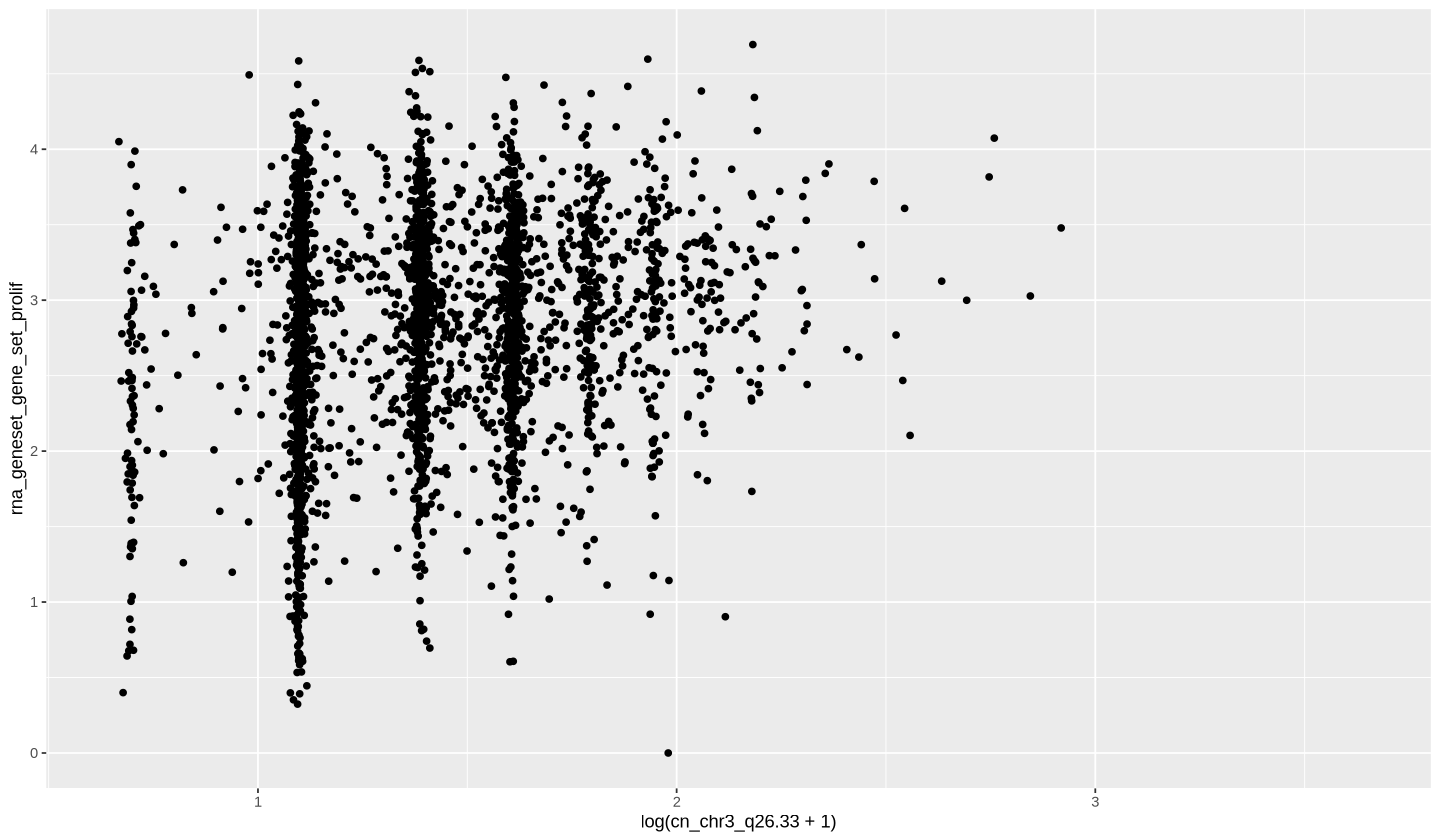

In [429]:
go %>% 
  ggplot(aes(x = log(cn_chr3_q26.33+1), 
             y = rna_geneset_gene_set_prolif)) + geom_point()

Warning message:
“Removed 2755 rows containing non-finite values (`stat_boxplot()`).”


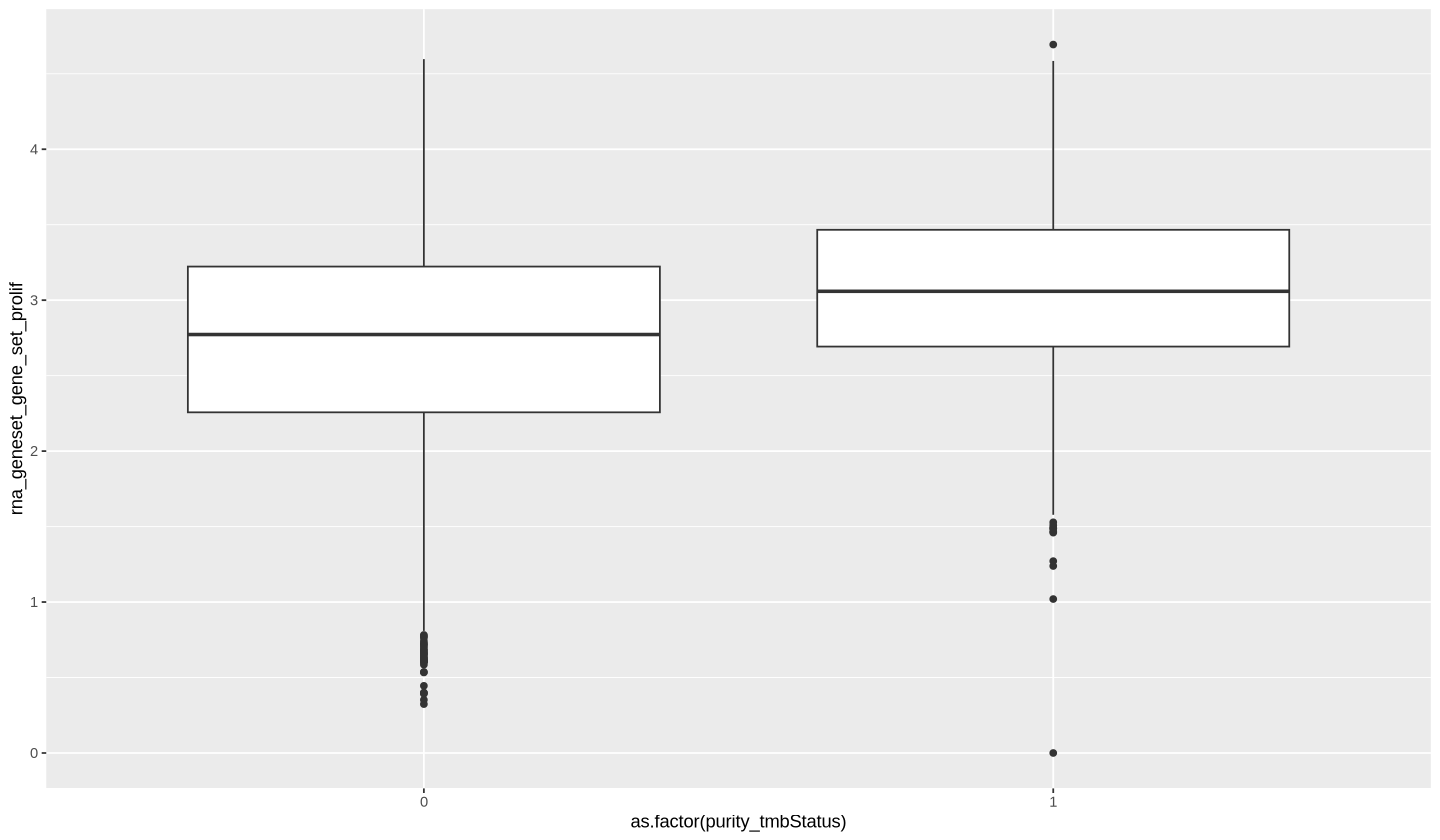

In [430]:
go %>% 
  ggplot(aes(x = as.factor(purity_tmbStatus), 
             y = rna_geneset_gene_set_prolif)) + geom_boxplot()

In [404]:
options(repr.plot.width = 12)

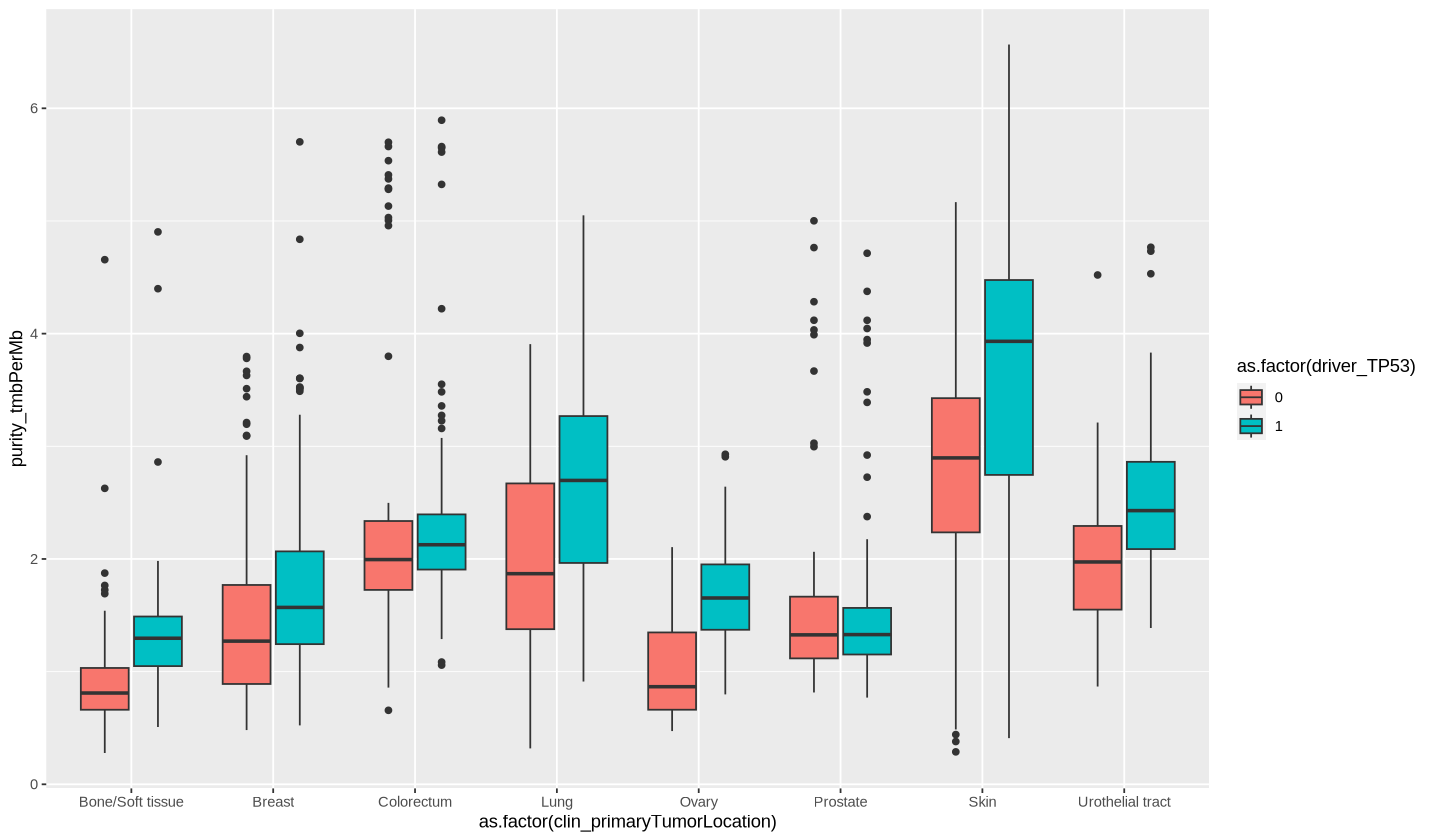

In [431]:
go %>% 
  drop_na(rna_geneset_gene_set_prolif, driver_TP53) %>% 
  filter( clin_primaryTumorLocation %in% c("Breast", "Colorectum", "Lung", "Prostate", "Bone/Soft tissue", "Skin", 
                                           "Urothelial tract", "Ovary")) %>% 
  ggplot(aes(x = as.factor(clin_primaryTumorLocation), 
             y = purity_tmbPerMb,
             fill = as.factor(driver_TP53))) + geom_boxplot()